In [171]:
from sklearn.datasets import load_boston, load_breast_cancer, load_iris, fetch_lfw_people

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

# Regression 

In [1]:
data=load_boston()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

ss = StandardScaler()
ss_fit = ss.fit(X_train)

X_train_transform = ss_fit.transform(X_train)
X_test_transform = ss_fit.transform(X_test)

NameError: name 'load_boston' is not defined

In [2]:
model = Sequential()

NameError: name 'Sequential' is not defined

In [123]:
model.add(Dense(13, input_dim=X_train_transform.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

In [124]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [125]:
model.fit(X_train_transform, y_train, validation_data=(X_test_transform, y_test), epochs=50)

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 1s 2ms/step - loss: 565.5280 - val_loss: 633.7134
Epoch 2/50
404/404 [==============================] - 0s 51us/step - loss: 554.8486 - val_loss: 619.1913
Epoch 3/50
404/404 [==============================] - 0s 58us/step - loss: 540.7131 - val_loss: 599.1958
Epoch 4/50
404/404 [==============================] - 0s 66us/step - loss: 521.8912 - val_loss: 572.9293
Epoch 5/50
404/404 [==============================] - 0s 67us/step - loss: 499.3677 - val_loss: 539.7020
Epoch 6/50
404/404 [==============================] - 0s 70us/step - loss: 471.1849 - val_loss: 499.6496
Epoch 7/50
404/404 [==============================] - 0s 60us/step - loss: 437.2971 - val_loss: 450.2598
Epoch 8/50
404/404 [==============================] - 0s 63us/step - loss: 395.3422 - val_loss: 394.4480
Epoch 9/50
404/404 [==============================] - 0s 56us/step - loss: 349.5460 - val_loss: 329.4913
Epoch 10/5

# Binary Classification

In [126]:
data = load_breast_cancer()

target = data.target* -1 + 1  

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

ss = StandardScaler()
ss_fit = ss.fit(X_train)

X_train_transform = ss_fit.transform(X_train)
X_test_transform = ss_fit.transform(X_test)

In [134]:
model = Sequential()

model.add(Dense(X_train_transform.shape[1], input_dim=X_train_transform.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_transform, y_train, validation_data=(X_test_transform, y_test), epochs=50)

Train on 455 samples, validate on 114 samples
Epoch 1/50
455/455 [==============================] - 1s 1ms/step - loss: 0.5823 - acc: 0.8308 - val_loss: 0.5242 - val_acc: 0.8947
Epoch 2/50
455/455 [==============================] - 0s 60us/step - loss: 0.4599 - acc: 0.9297 - val_loss: 0.3997 - val_acc: 0.9298
Epoch 3/50
455/455 [==============================] - 0s 63us/step - loss: 0.3391 - acc: 0.9495 - val_loss: 0.2861 - val_acc: 0.9386
Epoch 4/50
455/455 [==============================] - 0s 66us/step - loss: 0.2415 - acc: 0.9538 - val_loss: 0.2069 - val_acc: 0.9474
Epoch 5/50
455/455 [==============================] - 0s 74us/step - loss: 0.1789 - acc: 0.9560 - val_loss: 0.1579 - val_acc: 0.9386
Epoch 6/50
455/455 [==============================] - 0s 69us/step - loss: 0.1410 - acc: 0.9604 - val_loss: 0.1272 - val_acc: 0.9474
Epoch 7/50
455/455 [==============================] - 0s 62us/step - loss: 0.1190 - acc: 0.9714 - val_loss: 0.1075 - val_acc: 0.9474
Epoch 8/50
455/455 [====

In [148]:
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# import matplotlib.pyplot as plt
# %matplotlib inline

# plt.plot(history.history['val_acc'], label='val acc')
# plt.plot(history.history['acc'], label='train acc')
# plt.xlabel('epochs')
# plt.legend();

In [132]:
X_train_transform.shape

(455, 30)

In [136]:
pred = model.predict_classes(X_test_transform)

In [138]:
pred [ :, 0 ]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

# Multiclass Classification

In [156]:
data = load_iris()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [163]:
model = Sequential()

model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test_transform, y_test), epochs=50)

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 1s 6ms/step - loss: 1.8146 - acc: 0.1083 - val_loss: 1.1535 - val_acc: 0.3000
Epoch 2/50
120/120 [==============================] - 0s 55us/step - loss: 1.7864 - acc: 0.1083 - val_loss: 1.1481 - val_acc: 0.3667
Epoch 3/50
120/120 [==============================] - 0s 60us/step - loss: 1.7575 - acc: 0.3583 - val_loss: 1.1430 - val_acc: 0.3667
Epoch 4/50
120/120 [==============================] - 0s 76us/step - loss: 1.7295 - acc: 0.3583 - val_loss: 1.1378 - val_acc: 0.3667
Epoch 5/50
120/120 [==============================] - 0s 66us/step - loss: 1.7037 - acc: 0.1917 - val_loss: 1.1329 - val_acc: 0.3000
Epoch 6/50
120/120 [==============================] - 0s 54us/step - loss: 1.6750 - acc: 0.1000 - val_loss: 1.1282 - val_acc: 0.3000
Epoch 7/50
120/120 [==============================] - 0s 92us/step - loss: 1.6474 - acc: 0.1000 - val_loss: 1.1237 - val_acc: 0.3000
Epoch 8/50
120/120 [=====

In [169]:
# Dropouts

In [170]:
'''Code with Dropouts'''

model = Sequential()
model.add(Dropout(.5, input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(5, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=70)

Train on 120 samples, validate on 30 samples
Epoch 1/20
120/120 [==============================] - 1s 7ms/step - loss: 1.4757 - acc: 0.4167 - val_loss: 1.3816 - val_acc: 0.3000
Epoch 2/20
120/120 [==============================] - 0s 38us/step - loss: 1.4724 - acc: 0.4000 - val_loss: 1.3651 - val_acc: 0.3000
Epoch 3/20
120/120 [==============================] - 0s 41us/step - loss: 1.6895 - acc: 0.4083 - val_loss: 1.3488 - val_acc: 0.3333
Epoch 4/20
120/120 [==============================] - 0s 48us/step - loss: 1.4333 - acc: 0.4000 - val_loss: 1.3333 - val_acc: 0.3333
Epoch 5/20
120/120 [==============================] - 0s 55us/step - loss: 1.3214 - acc: 0.4583 - val_loss: 1.3188 - val_acc: 0.3333
Epoch 6/20
120/120 [==============================] - 0s 56us/step - loss: 1.3128 - acc: 0.4667 - val_loss: 1.3054 - val_acc: 0.3667
Epoch 7/20
120/120 [==============================] - 0s 43us/step - loss: 1.4933 - acc: 0.3833 - val_loss: 1.2929 - val_acc: 0.3667
Epoch 8/20
120/120 [=====

# Image Recognition 

In [172]:
data = fetch_lfw_people(min_faces_per_person=70)

In [174]:
import matplotlib.pyplot as plt 
%matplotlib inline

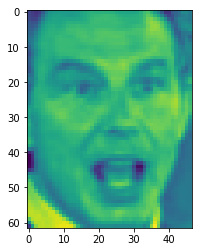

In [186]:
plt.imshow(data.images[275])

In [179]:
X = data.data
y = to_categorical(data.target)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [183]:
X_train[0:,]

array([[ 137.        ,  145.        ,  154.66667175, ...,   83.66666412,
          23.        ,   15.33333302],
       [ 180.66667175,  182.        ,  186.66667175, ...,   57.66666794,
          24.        ,   14.33333302],
       [  53.33333206,   63.33333206,   70.66666412, ...,  166.66667175,
         197.33332825,  204.        ],
       ..., 
       [  48.66666794,   58.66666794,   97.        , ...,   65.66666412,
          65.        ,   60.66666794],
       [  66.        ,   73.        ,   76.66666412, ...,   89.33333588,
          20.        ,   10.        ],
       [  94.66666412,  110.66666412,  134.        , ...,  168.66667175,
         101.66666412,   70.33333588]], dtype=float32)

In [188]:
X_train = X_train/255.
X_test = X_test/255.

In [190]:
model = Sequential()

model.add(Dense(X_train.shape[1], input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100)

Train on 1030 samples, validate on 258 samples
Epoch 1/5
1030/1030 [==============================] - 2s 2ms/step - loss: 1.7676 - acc: 0.3903 - val_loss: 1.7583 - val_acc: 0.3798
Epoch 2/5
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6804 - acc: 0.4194 - val_loss: 1.7062 - val_acc: 0.3798
Epoch 3/5
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6648 - acc: 0.4194 - val_loss: 1.7062 - val_acc: 0.3798
Epoch 4/5
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6532 - acc: 0.4194 - val_loss: 1.6968 - val_acc: 0.3798
Epoch 5/5
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6469 - acc: 0.4194 - val_loss: 1.6925 - val_acc: 0.3798


In [191]:
'''Code from Riley'''

model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Train on 1030 samples, validate on 258 samples
Epoch 1/10
1030/1030 [==============================] - 3s 3ms/step - loss: 1.8248 - acc: 0.3893 - val_loss: 1.8542 - val_acc: 0.3798
Epoch 2/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.7176 - acc: 0.4194 - val_loss: 1.7299 - val_acc: 0.3798
Epoch 3/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6702 - acc: 0.4194 - val_loss: 1.7155 - val_acc: 0.3798
Epoch 4/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6630 - acc: 0.4194 - val_loss: 1.7016 - val_acc: 0.3798
Epoch 5/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6627 - acc: 0.4194 - val_loss: 1.7214 - val_acc: 0.3798
Epoch 6/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6588 - acc: 0.4194 - val_loss: 1.6960 - val_acc: 0.3798
Epoch 7/10
1030/1030 [==============================] - 2s 2ms/step - loss: 1.6537 - acc: 0.4194 - val_loss: 1.7017 - val_acc: 0.3798
Epoch 8/10
1030